# Intro
This notebook is to develop a pipeline for generating plots using [seaborn](https://seaborn.pydata.org/index.html). 
Fig sizes/fonts/axises are tuned for paper submissions. 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')

# violinplot

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


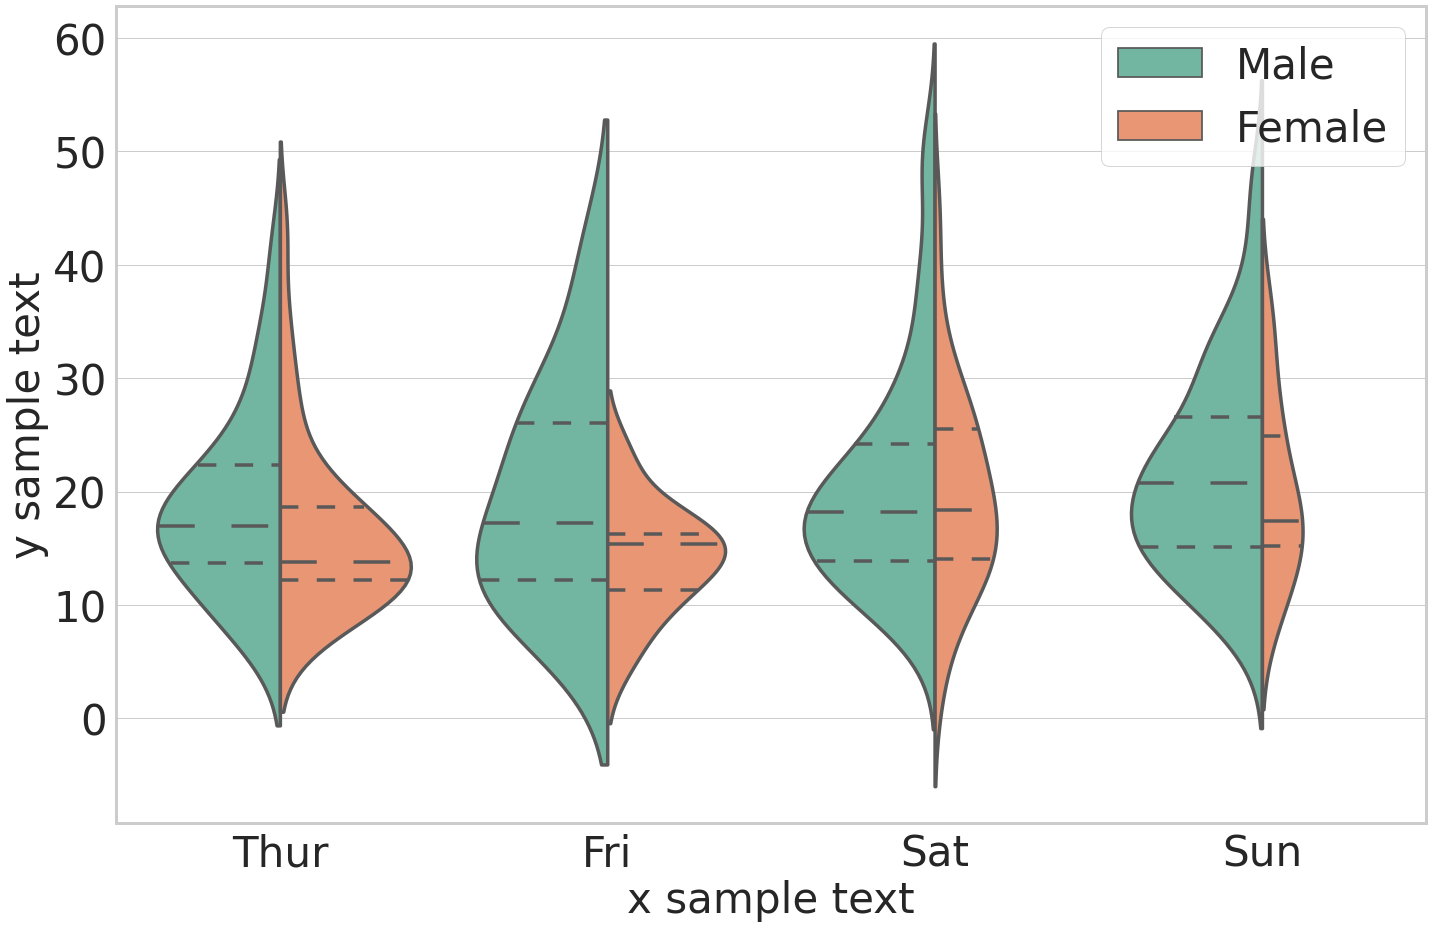

In [3]:
fig = plt.figure(figsize=(20, 13))


# draw the plot, x is the column to draw a single entry, y is the value for the plot, 
# if hue is selected, then split = True and y on different hue selections are compared in one violinplot,
# scale is "count"/"area"  to normalize the width,  innere defines those quartile lines
# width is the violin width, linewidth is the line width in the plots
ax = sns.violinplot(x="day", y="total_bill", hue="sex",
                    width= 0.8,
                    linewidth =3.5,
                    data=tips, palette="Set2", split=True,
                    scale="count", inner="quartile")

font_size = 42

plt.legend(loc='upper right',frameon=True, fontsize=font_size)


plt.xlabel('x sample text', fontsize=font_size)
plt.ylabel('y sample text', fontsize=font_size)

# ax.set_xlim(-100, 100)
# ax.set_ylim(0, 0.01)

plt.xticks(fontsize=font_size) # axis tick
plt.yticks(fontsize=font_size)
plt.setp(ax.spines.values(), linewidth=3) # framewidth of the axises
plt.tight_layout()
# plt.savefig('violin_sample.png')
plt.show()

# histplot

In [4]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


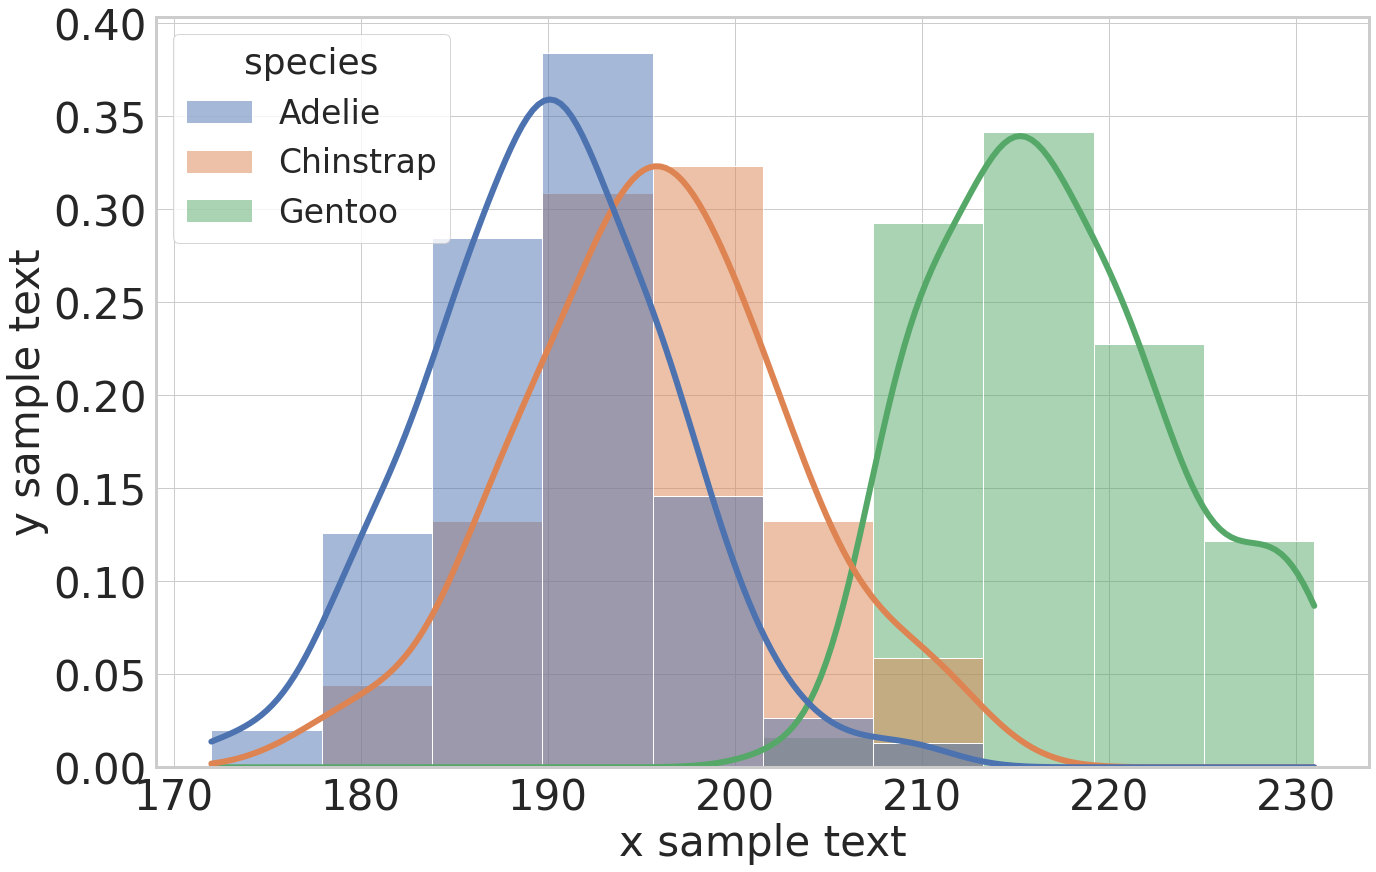

In [5]:
fig, ax = plt.subplots(figsize=(20, 13))

sns.set(font_scale=3, style="whitegrid") # CRITICAL: you can only set legend fontsize here,before you draw  the plot 
# stat: aggregate statistic to compute in each bin
# line_kws, line parameters for kde
ax = sns.histplot(
        penguins, x="flipper_length_mm", hue="species",
        stat="probability", common_norm=False,
        kde=True, fill=True, ax=ax,
        line_kws = dict(linewidth=6)
    )

font_size = 42


plt.xlabel('x sample text', fontsize=font_size)
plt.ylabel('y sample text', fontsize=font_size)
# ax.tick_params(axis='x', rotation=9) # rotate x axis
# ax.set_xlim(-100, 100)
# ax.set_ylim(0, 0.01)


plt.xticks(fontsize=font_size) # axis tick
plt.yticks(fontsize=font_size)

plt.setp(ax.spines.values(), linewidth=3) # framewidth of the axises
plt.tight_layout()
# plt.savefig('histgram_sample.png')
plt.show()

# barplot with confidence intervals

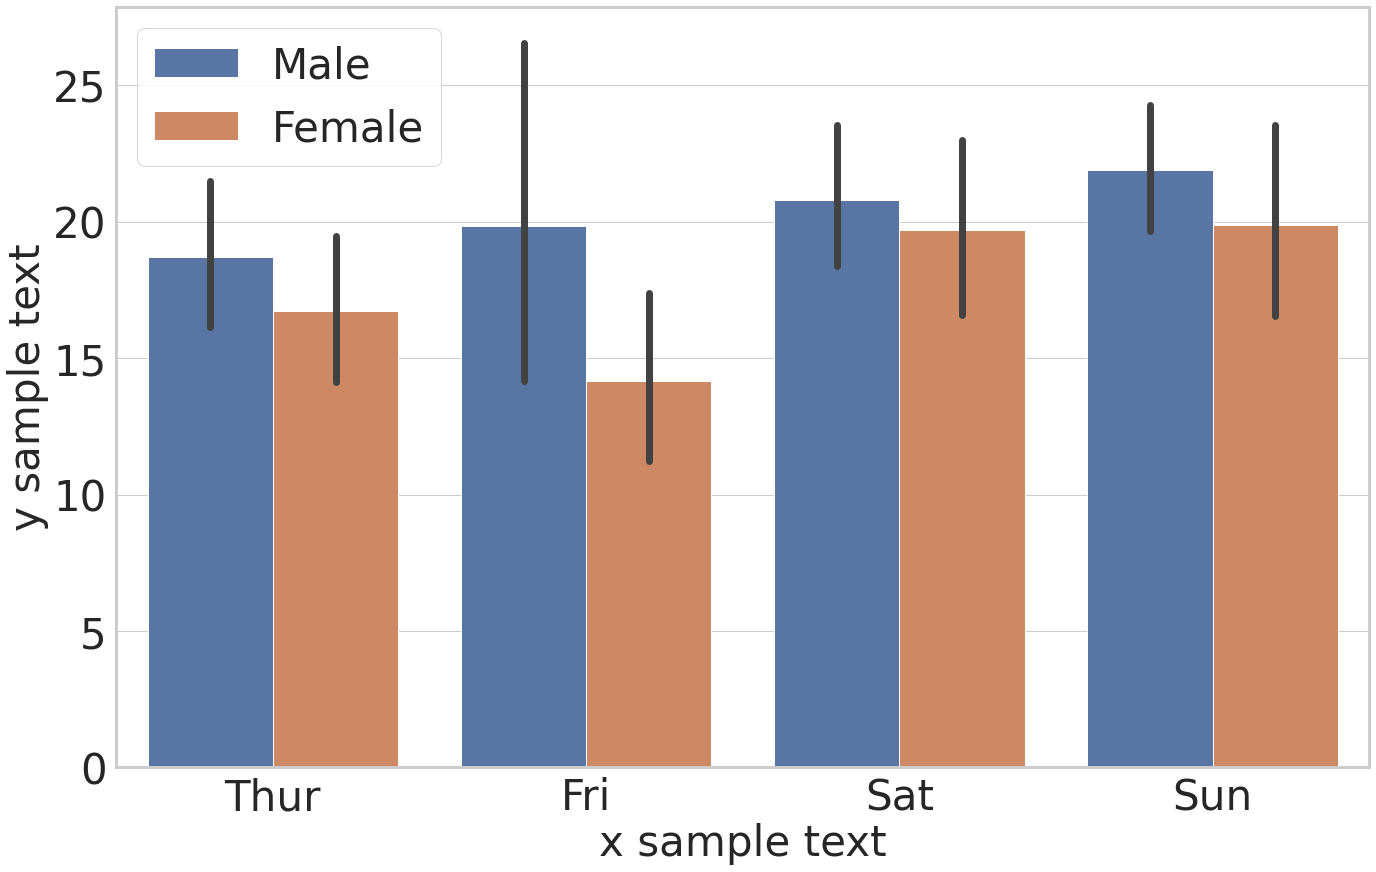

In [6]:
fig, ax = plt.subplots(figsize=(20, 13))

sns.set(font_scale=3, style="whitegrid") # CRITICAL: you can only set legend fontsize here,before you draw  the plot 
# stat: aggregate statistic to compute in each bin
# line_kws, line parameters for kde
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips, errwidth=7)

font_size = 42


plt.xlabel('x sample text', fontsize=font_size)
plt.ylabel('y sample text', fontsize=font_size)
# ax.set_xlim(-100, 100)
# ax.set_ylim(0, 0.01)
# ax.tick_params(axis='x', rotation=9) # rotate x axis

plt.xticks(fontsize=font_size) # axis tick
plt.yticks(fontsize=font_size)
plt.legend(loc='upper left',frameon=True, fontsize=font_size)
plt.setp(ax.spines.values(), linewidth=3) # framewidth of the axises
plt.tight_layout()
# plt.savefig('barplot_sample.png')
plt.show()